# Clustering Jerárquico y Dendogramas

Antes de empezar, introduciremos notación para que sea mas sencillo:

* X *dataset* (arrayde nxm) de puntos a clusterizar
* n *número de datos*
* m *número de rasgos*
* Z *array* de enlace de cluster con la información de la uniones
* k *número* de clusters

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial import distance_matrix
from scipy.spatial.distance import pdist
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

(150, 2)


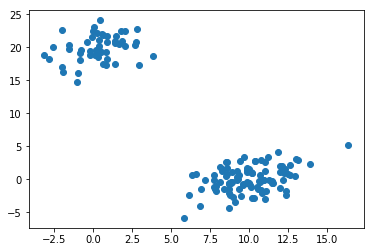

<Figure size 432x288 with 0 Axes>

In [29]:
np.random.seed(4711)
n = 100
a = np.random.multivariate_normal([10,0], [[3,1], [1,4]], size=[100,])
b = np.random.multivariate_normal([0,20], [[3,1], [1,4]], size=[50,])
X = np.concatenate((a,b))
print(X.shape)
plt.scatter(X[:,0], X[:,1])
plt.show()
plt.savefig('Antes del Clustering')

In [30]:
Z = linkage(X, 'ward')

In [31]:
c, coph_dist = cophenet(Z, pdist(X))

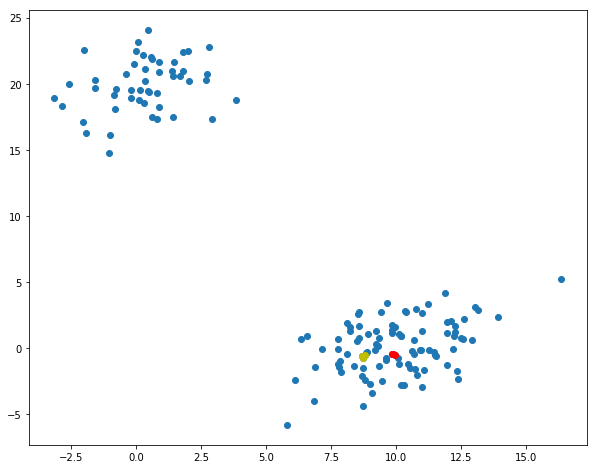

In [32]:
idx = [33, 62, 68]
idx2 = [15, 69, 41]
plt.figure(figsize = (10,8))
plt.scatter(X[:,0], X[:,1])
plt.scatter(X[idx,0], X[idx,1], c='r')
plt.scatter(X[idx2,0], X[idx2, 1], c='y')
plt.show()

## Representación de un dendrograma

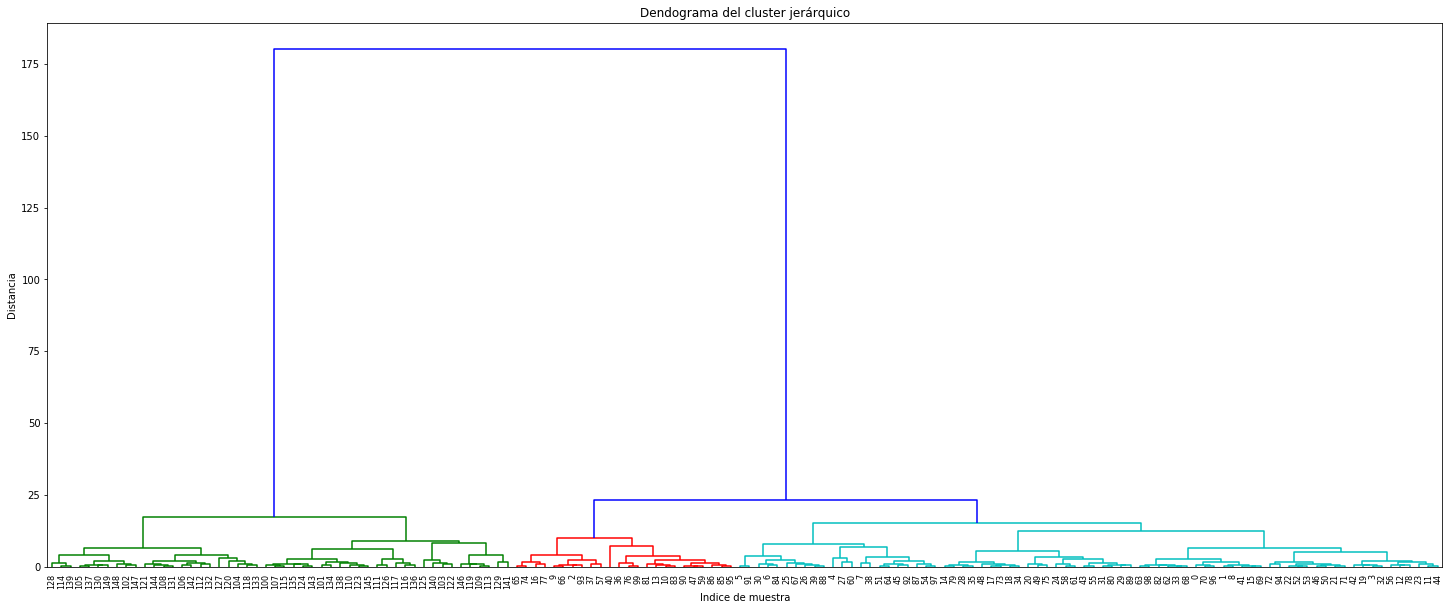

In [33]:
plt.figure(figsize=(25,10))
plt.title('Dendograma del cluster jerárquico')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8.0, color_threshold=18)
plt.savefig('Dendograma aletorio')


In [34]:
Z[-4:,]

array([[290.        , 294.        ,  15.11533118,  76.        ],
       [287.        , 292.        ,  17.11527362,  50.        ],
       [293.        , 295.        ,  23.12198936, 100.        ],
       [296.        , 297.        , 180.27043021, 150.        ]])

### Truncar el dendograma

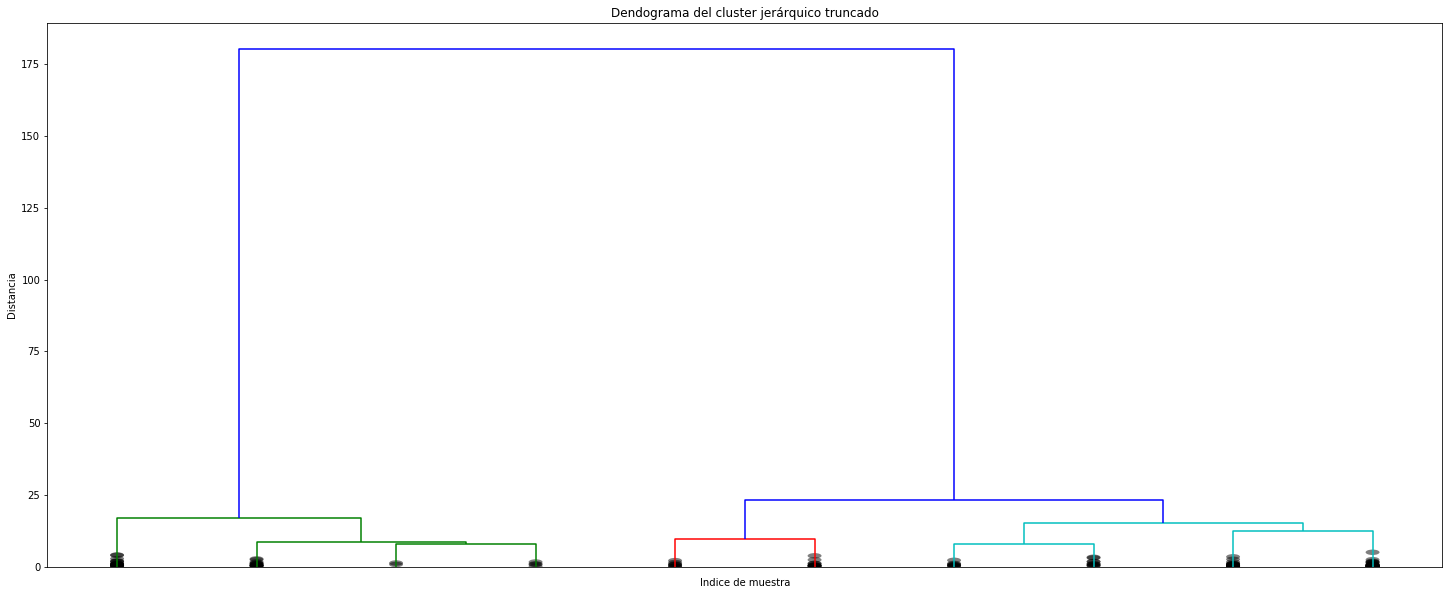

In [35]:
plt.figure(figsize=(25,10))
plt.title('Dendograma del cluster jerárquico truncado')
plt.xlabel('Indice de muestra')
plt.ylabel('Distancia')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8.0, color_threshold=18,
           truncate_mode='lastp', p=10, show_leaf_counts=False, show_contracted=True)
plt.savefig('Dendograma aletorio truncado')

### Dendograma

In [36]:
def dendogramTune(*args, **kwards):
    max_d = kwards.pop('max_d', None)
    if max_d and 'color_threshold' not in kwards:
        kwards['color_threshold'] = max_d
    annotate_above = kwards.pop('annotate_above', 0)
    ddata = dendrogram(*args, **kwards)
    if not kwards.get('no_plot', False):
        plt.title('Clustering jerárquico con Dendograma truncado')
        plt.xlabel('Tamaño del Cluster')
        plt.ylabel('Distancia')
        for index, distance, color in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(index[1:3])
            y = distance[1]
            if y > annotate_above:
                plt.plot(x,y, 'o', c=color)
                plt.annotate('%.3g'%y, (x,y), xytext=(0,-5),
                            textcoords='offset points', va='top', ha='center')
    if max_d:
        plt.axhline(y=max_d, c='k')
    return ddata

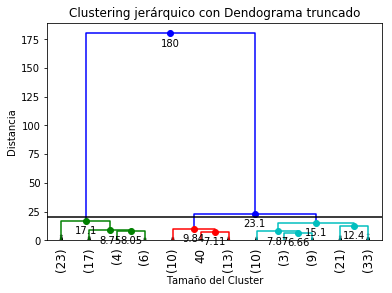

In [37]:
dendogramTune(Z, truncate_mode='lastp', p=12, leaf_rotation=90, leaf_font_size=12.,
             show_contracted=True, max_d = 20)
plt.show()

#### método de la inconsistencia 
 * definimos la inconsistencia como el cociente entre la distancia_i y la distancia media 

In [38]:
from scipy.cluster.hierarchy import inconsistent

In [39]:
depth = 5
inconn = inconsistent(Z, depth)
inconn[-10:]

array([[ 1.80874989,  2.17061644, 10.        ,  2.44276733],
       [ 2.31731998,  2.19649179, 16.        ,  2.52742372],
       [ 2.24511599,  2.44225327,  9.        ,  2.37659088],
       [ 2.30462321,  2.44191287, 21.        ,  2.6387508 ],
       [ 2.20673283,  2.68378067, 17.        ,  2.84581581],
       [ 1.95309037,  2.58100378, 29.        ,  4.05821033],
       [ 3.46173275,  3.53735716, 28.        ,  3.29443647],
       [ 3.15857131,  3.54836284, 28.        ,  3.93327935],
       [ 4.90210137,  5.10301603, 28.        ,  3.57041559],
       [12.12200256, 32.15467931, 30.        ,  5.22936105]])

#### Método del codo


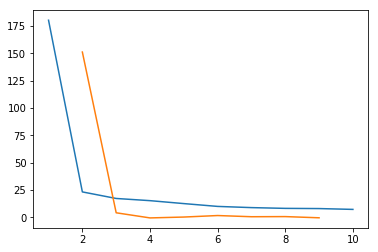

El número optimo de cluster es 2


<Figure size 432x288 with 0 Axes>

In [40]:
last = Z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
plt.savefig('Método del codo')
k = acc_rev.argmax() + 2
print("El número optimo de cluster es %d"%k)

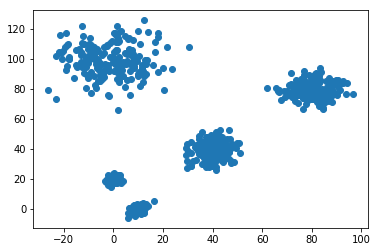

In [41]:
c = np.random.multivariate_normal([40,40], [[20,1], [1,30]], size=[200,])
d = np.random.multivariate_normal([80,80], [[30,1], [1,30]], size=[200,])
e = np.random.multivariate_normal([0,100], [[100,1], [1,100]], size=[200,])

x_2 = np.concatenate((X, c, d, e), )
plt.scatter(x_2[:,0], x_2[:,1])
plt.show()

In [42]:
Z_2 = linkage(x_2, 'ward')

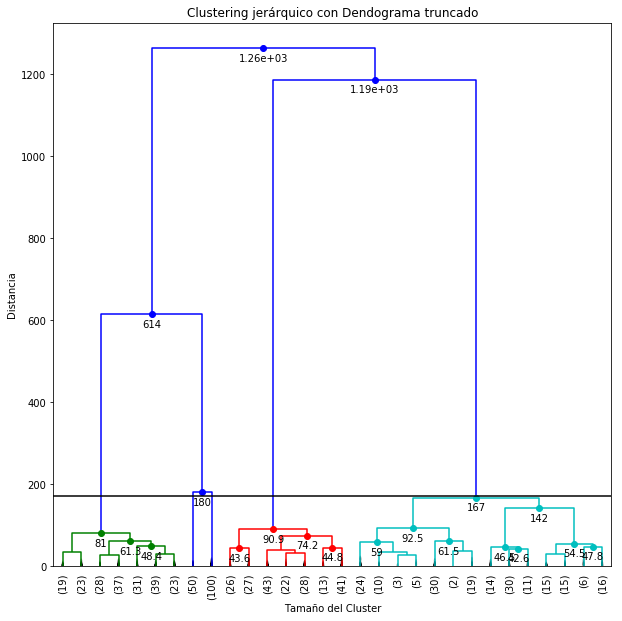

In [43]:
plt.figure(figsize=(10,10))
dendogramTune(Z_2, truncate_mode='lastp', p=30, leaf_rotation=90,
              leaf_font_size=10., show_contracted=True, annotate_above=40, max_d=170
            )
plt.show()

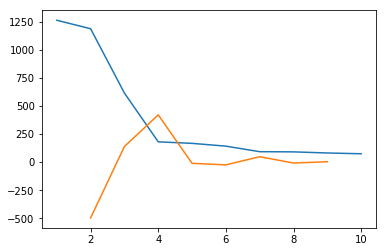

El número optimo de cluster es 4


<Figure size 432x288 with 0 Axes>

In [44]:
last = Z_2[-10:,2]
last_rev = last[::-1]
idx = np.arange(1, len(last)+1)
plt.plot(idx, last_rev)

acc = np.diff(last,2)
acc_rev = acc[::-1]
plt.plot(idx[:-2]+1, acc_rev)
plt.show()
plt.savefig('Método del codo con Z_2')
k = acc_rev.argmax() + 2
print("El número optimo de cluster es %d"%k)

## Recuperar los clusters y sus elementos

In [45]:
from scipy.cluster.hierarchy import fcluster

In [48]:
max_distance = 30
cluster = fcluster(Z, max_distance, criterion='distance')
cluster

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [47]:
cluster_num = 3
clusters = fcluster(Z, cluster_num, criterion='maxclust')
clusters

array([3, 3, 2, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 3, 3, 2, 3, 3, 3,
       3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 2, 3, 2, 2, 3, 3, 3, 2, 3, 2, 3, 2, 2, 3,
       3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

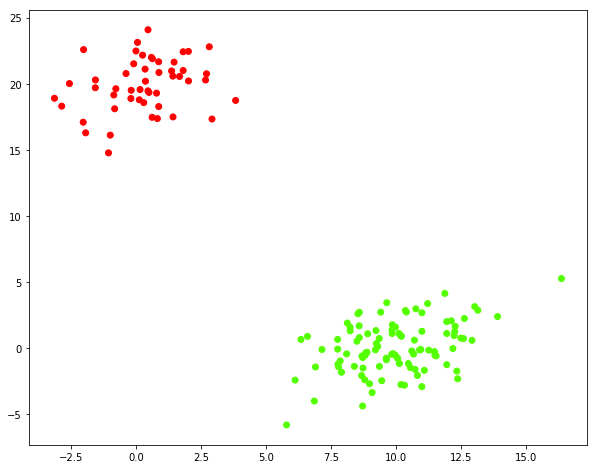

In [49]:
plt.figure(figsize=(10,8))
plt.scatter(X[:,0], X[:,1], c = cluster, cmap='prism')
plt.show()

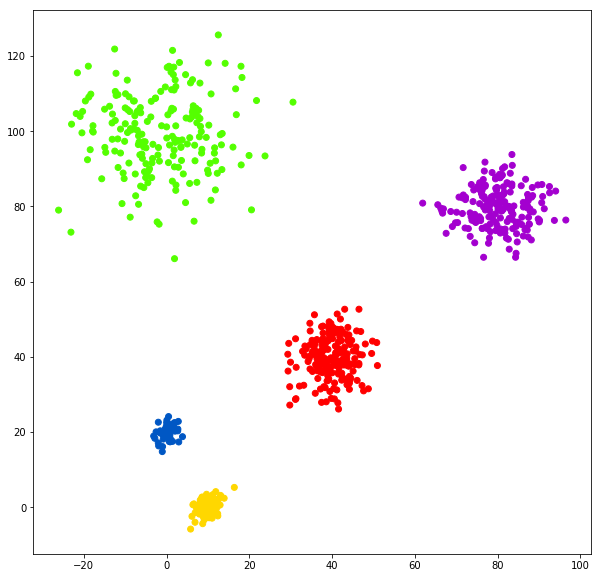

In [51]:
max_distance = 170
clusters = fcluster(Z_2, max_distance, criterion='distance')
plt.figure(figsize=(10,10))
plt.scatter(x_2[:,0], x_2[:,1], c = clusters, cmap='prism')